In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# tampilan grafik lebih rapi
plt.style.use('seaborn-v0_8')

df = pd.read_csv('Dataset-Emas.csv')
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,31/10/2025,"4.013,30","4.049,20","4.077,00","4.004,50","0,55K","-0,49%"
1,30/10/2025,"4.033,00","3.950,00","4.057,70","3.945,40","0,69K","0,81%"
2,29/10/2025,"4.000,70","3.967,20","4.046,20","3.930,00","288,27K","0,44%"
3,28/10/2025,"3.983,10","3.999,90","4.034,20","3.901,30","338,43K","-0,91%"
4,27/10/2025,"4.019,70","4.103,20","4.123,80","3.985,90","330,75K","-1,44%"


In [37]:
#Data Cleaning (Konversi format angka + tanggal)

#Dataset harga emas biasanya menggunakan format 1.234,56
# → titik = pemisah ribuan
# → koma = desimal
df_clean = df.copy()

# Kolom numerik untuk diproses
num_cols = ["Terakhir", "Pembukaan", "Tertinggi", "Terendah"]

for col in num_cols:
    df_clean[col] = (
        df_clean[col]
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
        .astype(float)
    )

# Ubah tanggal
df_clean['Tanggal'] = pd.to_datetime(df_clean['Tanggal'], dayfirst=True)

# Sort data berdasarkan tanggal
df_clean = df_clean.sort_values('Tanggal').reset_index(drop=True)

df_clean.head()


,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2021-01-01,1898.10,1897.69,1899.12,1897.39,NaN,"0,09%"
1,2021-01-04,1942.28,1906.05,1944.65,1905.36,NaN,"2,33%"
2,2021-01-05,1949.35,1942.65,1953.17,1934.08,NaN,"0,36%"
3,2021-01-06,1918.81,1950.30,1959.60,1901.11,NaN,"-1,57%"
4,2021-01-07,1912.50,1919.40,1927.97,1906.86,NaN,"-0,33%"


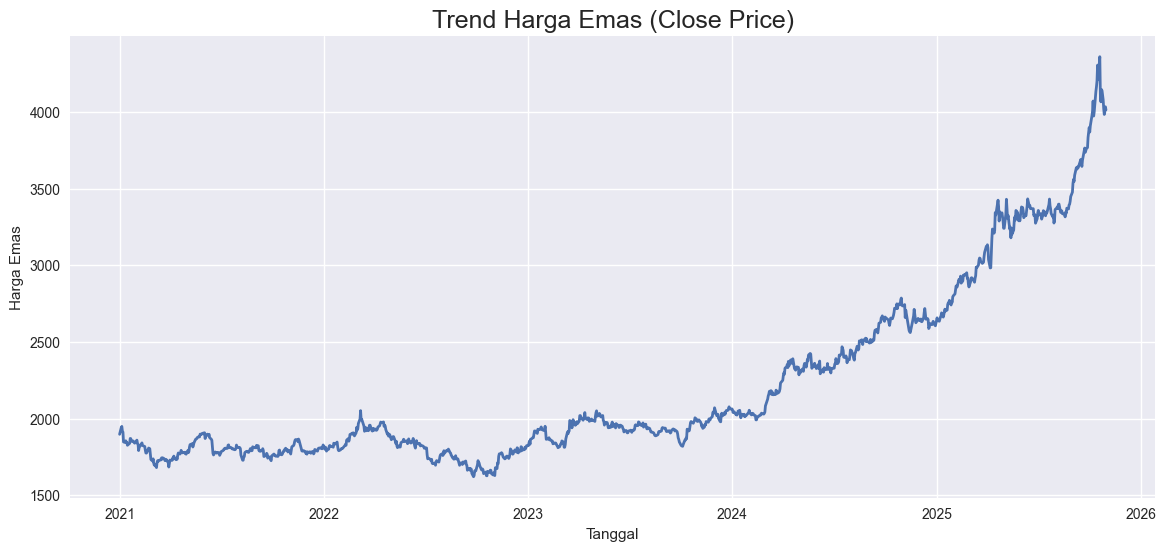

In [38]:
# Exploratory Data Analysis (EDA)

# Di bagian ini kita akan melakukan analisis data:
# Trend jangka panjang
# Perbandingan Open, High, Low, Close
# Candlestick-style plot
# Volatilitas harian
# Moving Average 50 & 200 hari

plt.figure(figsize=(14,6))
plt.plot(df_clean['Tanggal'], df_clean['Terakhir'], linewidth=2)
plt.title("Trend Harga Emas (Close Price)", fontsize=18)
plt.xlabel("Tanggal")
plt.ylabel("Harga Emas")
plt.grid(True)
plt.show()


## Analisis

Harga emas terlihat naik signifikan mulai akhir 2024 sampai 2025.
Ada fase konsolidasi 2021–2022 dengan fluktuasi yang tidak terlalu ekstrem.
Trend besar adalah uptrend kuat, cocok untuk model GRU yang sensitif pada pola berurutan.

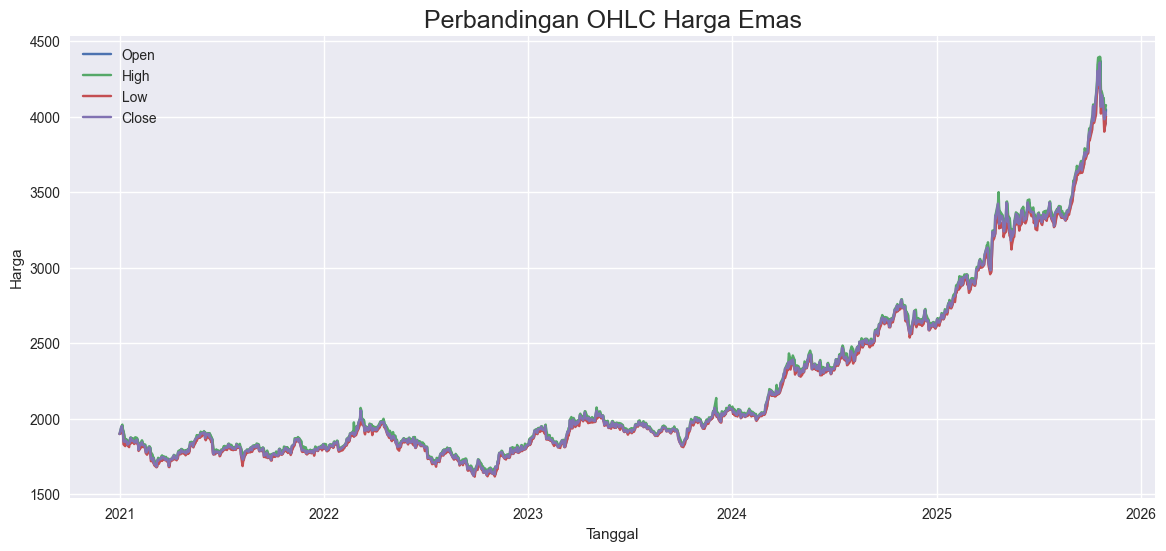

In [39]:
# Perbandingan Open–High–Low–Close (OHLC)
plt.figure(figsize=(14,6))
plt.plot(df_clean['Tanggal'], df_clean['Pembukaan'], label='Open')
plt.plot(df_clean['Tanggal'], df_clean['Tertinggi'], label='High')
plt.plot(df_clean['Tanggal'], df_clean['Terendah'], label='Low')
plt.plot(df_clean['Tanggal'], df_clean['Terakhir'], label='Close')
plt.legend()
plt.title("Perbandingan OHLC Harga Emas", fontsize=18)
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.grid(True)
plt.show()


## 📝 Analisis

- Spread High–Low semakin besar pada 2024–2025 → volatilitas meningkat.

- High selalu menjadi puncak harga harian, Low titik terendah → pola normal.

- Data ini sangat cocok untuk multivariate GRU, karena fitur High/Low/Open memberi lebih banyak konteks.

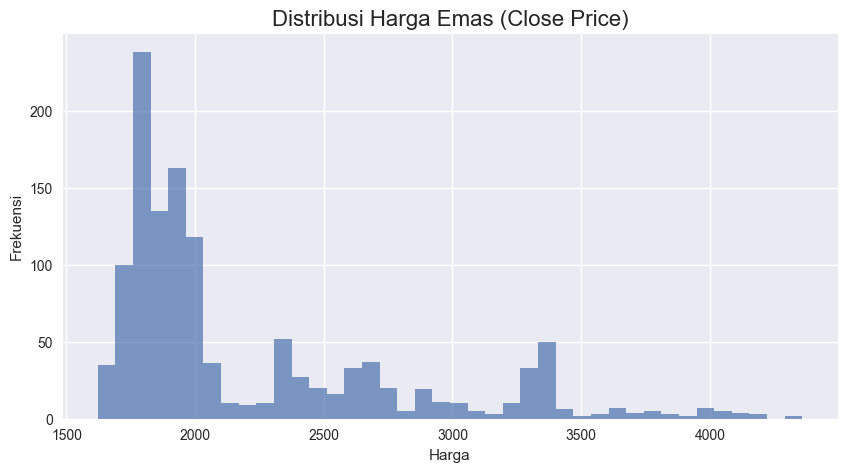

In [40]:
# Distribusi Harga (Histogram + KDE)

plt.figure(figsize=(10,5))
plt.hist(df_clean['Terakhir'], bins=40, alpha=0.7)
plt.title("Distribusi Harga Emas (Close Price)", fontsize=16)
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()


## Analisis

- Distribusi miring ke kanan (right skewed).

- Harga lebih sering berada di area 1700–2300 periode awal dataset.

- Kenaikan drastis 2024–2025 membuat tail menjadi panjang.

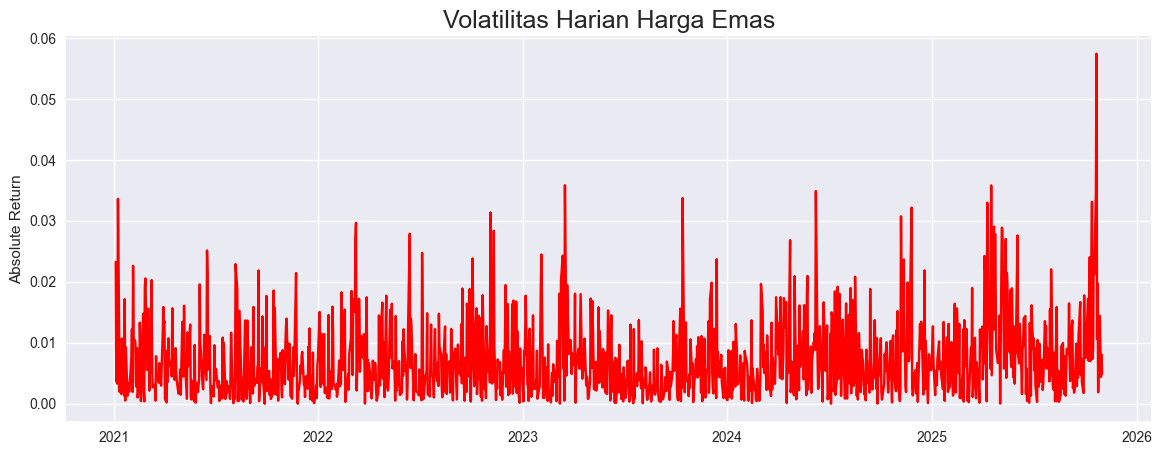

In [41]:
# Volatilitas Harian (Absolute Return
df_clean['Return'] = df_clean['Terakhir'].pct_change()
df_clean['Volatility'] = df_clean['Return'].abs()

plt.figure(figsize=(14,5))
plt.plot(df_clean['Tanggal'], df_clean['Volatility'], color='red')
plt.title("Volatilitas Harian Harga Emas", fontsize=18)
plt.ylabel("Absolute Return")
plt.grid(True)
plt.show()


## Analisis

- Volatilitas jauh lebih tinggi pada 2024–2025.

- Ini menandakan pasar lebih aktif dan perubahan harga lebih agresif.

- Model GRU perlu window dan fitur yang baik agar tidak overfit.

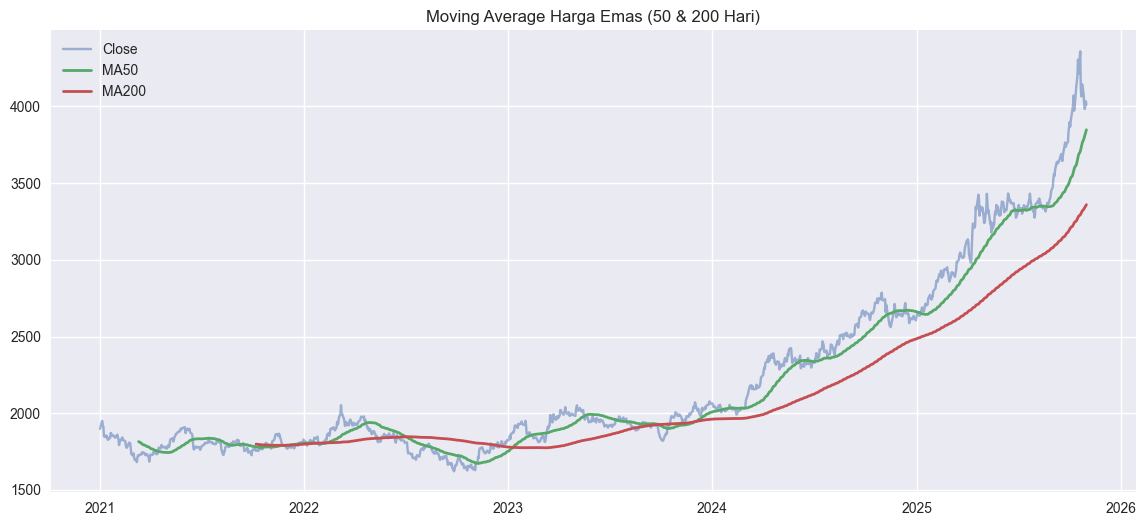

In [42]:
# Moving Average 50 & 200 hari
df_clean['MA50'] = df_clean['Terakhir'].rolling(50).mean()
df_clean['MA200'] = df_clean['Terakhir'].rolling(200).mean()

plt.figure(figsize=(14,6))
plt.plot(df_clean['Tanggal'], df_clean['Terakhir'], label='Close', alpha=0.5)
plt.plot(df_clean['Tanggal'], df_clean['MA50'], label='MA50', linewidth=2)
plt.plot(df_clean['Tanggal'], df_clean['MA200'], label='MA200', linewidth=2)
plt.legend()
plt.title("Moving Average Harga Emas (50 & 200 Hari)")
plt.grid(True)
plt.show()


## Analisis

- Golden Cross: MA50 memotong MA200 → biasanya sinyal bullish.

- Ini sesuai dengan kenaikan besar harga emas pada akhir 2024–2025.

- Moving average membantu memahami pola dan trend jangka panjang.

# Preprocessing → Modeling GRU

In [43]:
# Normalisasi Data (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

# copy dataframe untuk modeling
data = df_clean.copy()

# fitur univariate (close/terakhir)
uni_data = data[['Terakhir']].values

# fitur multivariate (close, open, high, low)
multi_data = data[['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']].values

# scaler
scaler_uni = MinMaxScaler()
scaler_multi = MinMaxScaler()

uni_norm = scaler_uni.fit_transform(uni_data)
multi_norm = scaler_multi.fit_transform(multi_data)


In [44]:
# Split 80% Train — 20% Test
train_size = int(len(uni_norm) * 0.8)

# Univariate
train_uni = uni_norm[:train_size]
test_uni = uni_norm[train_size:]

# Multivariate
train_multi = multi_norm[:train_size]
test_multi = multi_norm[train_size:]

print(len(train_uni), len(test_uni))


1006 252


In [45]:
# Sliding Window Function (window = 5)
import numpy as np

def sliding_window(data, window=5):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)


In [46]:
# Generate dataset untuk univariate dan multivariate
window = 5

# Univariate
X_train_uni, y_train_uni = sliding_window(train_uni, window)
X_test_uni, y_test_uni = sliding_window(test_uni, window)

# Multivariate
X_train_multi, y_train_multi = sliding_window(train_multi, window)
X_test_multi, y_test_multi = sliding_window(test_multi, window)

X_train_uni.shape, X_train_multi.shape


((1001, 5, 1), (1001, 5, 4))

## Model GRU Univariate

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model_uni = Sequential([
    GRU(64, return_sequences=False, input_shape=(window, 1)),
    Dense(1)
])

model_uni.compile(optimizer='adam', loss='mse')
model_uni.summary()

history_uni = model_uni.fit(
    X_train_uni, y_train_uni,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    verbose=1
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                12864     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12929 (50.50 KB)
Trainable params: 12929 (50.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 3s 23ms/step - loss: 0.0033 - val_loss: 0.0180
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 4.6690e-04 - val_loss: 5.5008e-04
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 7.8043e-05 - val_loss: 1.6714e-04
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 7.2521e-05 - val_loss: 1.51

## Model GRU Multivariate

In [48]:
model_multi = Sequential([
    GRU(64, return_sequences=False, input_shape=(window, 4)),
    Dense(1)
])

model_multi.compile(optimizer='adam', loss='mse')
model_multi.summary()

history_multi = model_multi.fit(
    X_train_multi, y_train_multi,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    verbose=1
)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 64)                13440     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13505 (52.75 KB)
Trainable params: 13505 (52.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 3s 21ms/step - loss: 0.0013 - val_loss: 1.4802e-04
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 9.7966e-05 - val_loss: 1.5192e-04
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 6.9624e-05 - val_loss: 1.4370e-04
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 6.7950e-05 - val_loss: 

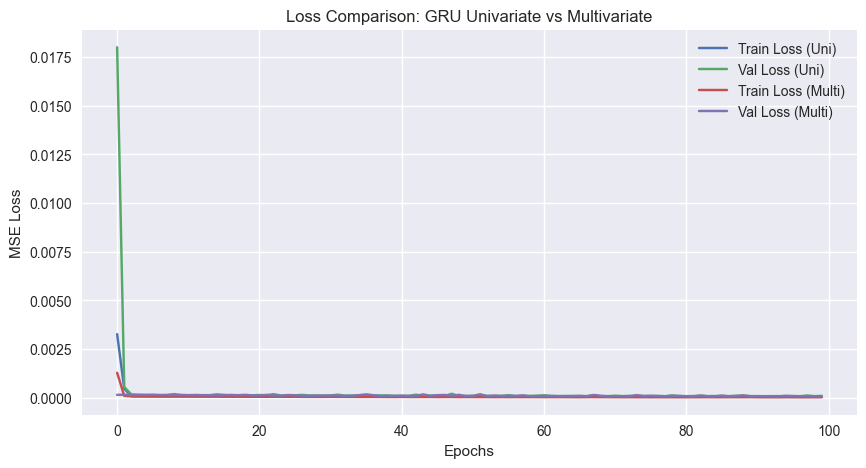

In [49]:
# Visualisasi Loss Training vs Validation
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history_uni.history['loss'], label='Train Loss (Uni)')
plt.plot(history_uni.history['val_loss'], label='Val Loss (Uni)')
plt.plot(history_multi.history['loss'], label='Train Loss (Multi)')
plt.plot(history_multi.history['val_loss'], label='Val Loss (Multi)')
plt.legend()
plt.title("Loss Comparison: GRU Univariate vs Multivariate")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ======================================================
#   UNIVARIATE
# ======================================================
pred_uni = model_uni.predict(X_test_uni).reshape(-1,1)

# Denormalisasi prediksi & target (univariate hanya 1 kolom)
pred_uni_denorm = scaler_uni.inverse_transform(pred_uni)
y_test_uni_denorm = scaler_uni.inverse_transform(y_test_uni)

# Evaluasi
rmse_uni = np.sqrt(mean_squared_error(y_test_uni_denorm, pred_uni_denorm))
mae_uni  = mean_absolute_error(y_test_uni_denorm, pred_uni_denorm)


# ======================================================
#   MULTIVARIATE  (ini yang benar!)
# ======================================================

# prediksi multivariate dari model (output 1 kolom: close)
pred_multi = model_multi.predict(X_test_multi).reshape(-1,1)

# --- DENORMALISASI DENGAN BENAR ---
# scaler_multi fit ke 4 fitur → harus buat dummy feature
dummy = np.zeros((pred_multi.shape[0], scaler_multi.n_features_in_ - 1))

pred_multi_full = np.concatenate([dummy, pred_multi], axis=1)

# inverse transform lalu ambil kolom CLOSE
pred_multi_denorm = scaler_multi.inverse_transform(pred_multi_full)[:, -1]

# Denormalisasi y_test (kolom close berada pada index 0 atau -1 sesuai dataset)
y_test_multi_full = np.concatenate([
    np.zeros((y_test_multi.shape[0], scaler_multi.n_features_in_ - 1)),
    y_test_multi[:, 0].reshape(-1,1)
], axis=1)

y_test_multi_denorm = scaler_multi.inverse_transform(y_test_multi_full)[:, -1]

# Evaluasi
rmse_multi = np.sqrt(mean_squared_error(y_test_multi_denorm, pred_multi_denorm))
mae_multi  = mean_absolute_error(y_test_multi_denorm, pred_multi_denorm)


# ======================================================
#   PRINT RESULTS
# ======================================================
print("=== Evaluation Results ===")
print(f"Univariate RMSE : {rmse_uni:.4f}")
print(f"Univariate MAE  : {mae_uni:.4f}")
print()
print(f"Multivariate RMSE : {rmse_multi:.4f}")
print(f"Multivariate MAE  : {mae_multi:.4f}")


8/8 [==============================] - 0s 3ms/step
=== Evaluation Results ===
Univariate RMSE : 52.1091
Univariate MAE  : 38.0114

Multivariate RMSE : 42.1521
Multivariate MAE  : 28.8178


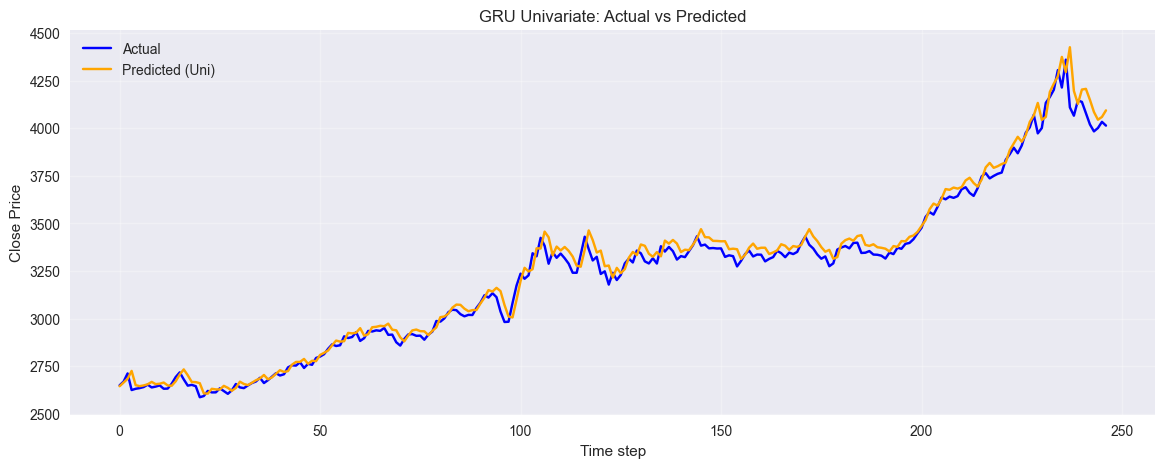

In [75]:
# ==============================
# VISUALISASI PREDIKSI VS ACTUAL
# ==============================
# Univariate
plt.figure(figsize=(14,5))
plt.plot(y_test_uni_denorm, label='Actual', color='blue')
plt.plot(pred_uni_denorm, label='Predicted (Uni)', color='orange')
plt.title("GRU Univariate: Actual vs Predicted")
plt.xlabel("Time step")
plt.ylabel("Close Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

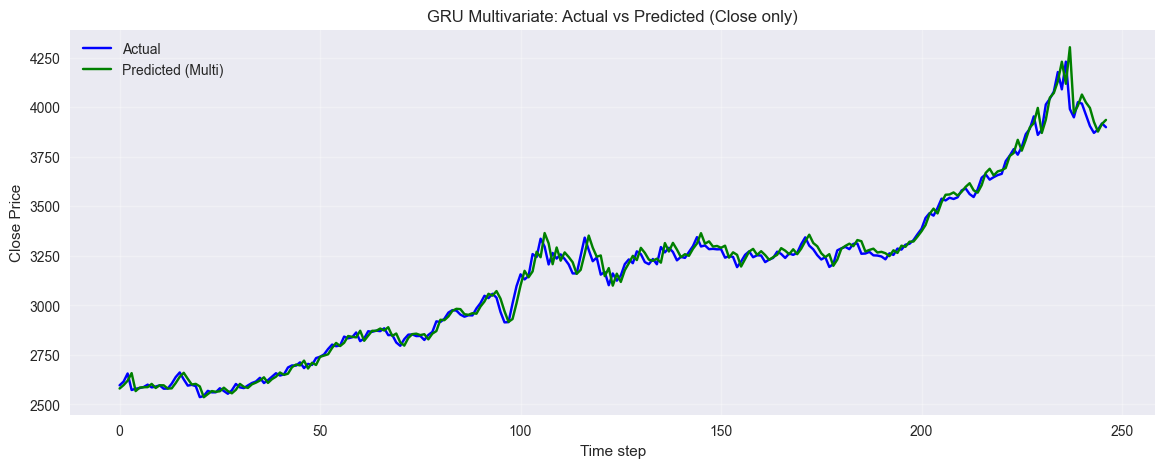

In [76]:
# Multivariate
plt.figure(figsize=(14,5))
plt.plot(y_test_multi_denorm, label='Actual', color='blue')
plt.plot(pred_multi_denorm, label='Predicted (Multi)', color='green')
plt.title("GRU Multivariate: Actual vs Predicted (Close only)")
plt.xlabel("Time step")
plt.ylabel("Close Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

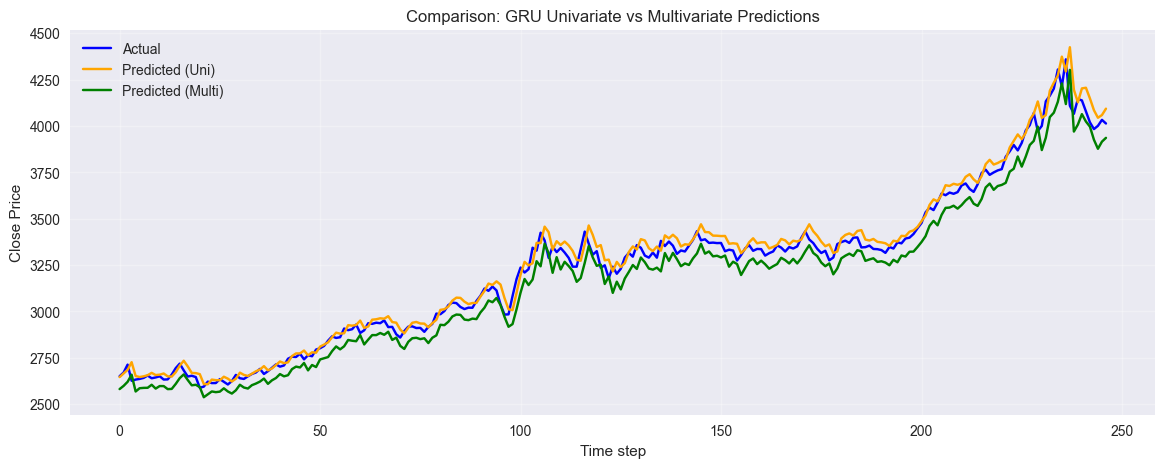

In [77]:
# ==============================
# COMPARISON UNIVARIATE VS MULTIVARIATE
# ==============================
plt.figure(figsize=(14,5))
plt.plot(y_test_uni_denorm, label='Actual', color='blue')
plt.plot(pred_uni_denorm, label='Predicted (Uni)', color='orange')
plt.plot(pred_multi_denorm, label='Predicted (Multi)', color='green')
plt.title("Comparison: GRU Univariate vs Multivariate Predictions")
plt.xlabel("Time step")
plt.ylabel("Close Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [78]:
future_steps = 30   # jumlah hari ke depan yang ingin diprediksi

last_window_uni = X_test_uni[-1].reshape(1, -1, 1)  
future_uni_norm = []

window = last_window_uni.copy()

for _ in range(future_steps):
    pred = model_uni.predict(window)[0][0]
    future_uni_norm.append(pred)

    # update window
    new_window = np.append(window[:, 1:, :], [[[pred]]], axis=1)
    window = new_window

# denormalisasi
future_uni = scaler_uni.inverse_transform(np.array(future_uni_norm).reshape(-1,1))


1/1 [==============================] - 0s 27ms/step


In [79]:
future_steps = 30

last_window_multi = X_test_multi[-1].reshape(1, 5, X_test_multi.shape[2])
future_multi_norm = []

window = last_window_multi.copy()

for _ in range(future_steps):
    pred = model_multi.predict(window)[0][0]
    future_multi_norm.append(pred)

    # fitur multivariate = semua kolom diisi nilai close prediksi
    new_features = np.array([pred] * X_test_multi.shape[2]).reshape(1,1,-1)

    # update window
    new_window = np.concatenate([window[:,1:,:], new_features], axis=1)
    window = new_window

# Denormalisasi multivariate
dummy = np.zeros((future_steps, scaler_multi.n_features_in_ - 1))
future_multi_full = np.concatenate([dummy, np.array(future_multi_norm).reshape(-1,1)], axis=1)

future_multi = scaler_multi.inverse_transform(future_multi_full)[:, -1]


1/1 [==============================] - 0s 45ms/step


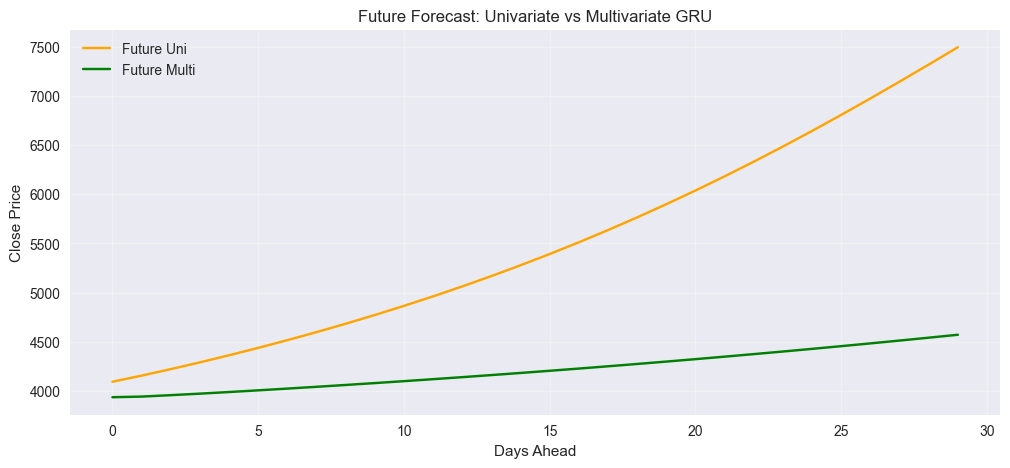

In [80]:
plt.figure(figsize=(12,5))
plt.plot(future_uni, label='Future Uni', color='orange')
plt.plot(future_multi, label='Future Multi', color='green')
plt.title("Future Forecast: Univariate vs Multivariate GRU")
plt.xlabel("Days Ahead")
plt.ylabel("Close Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


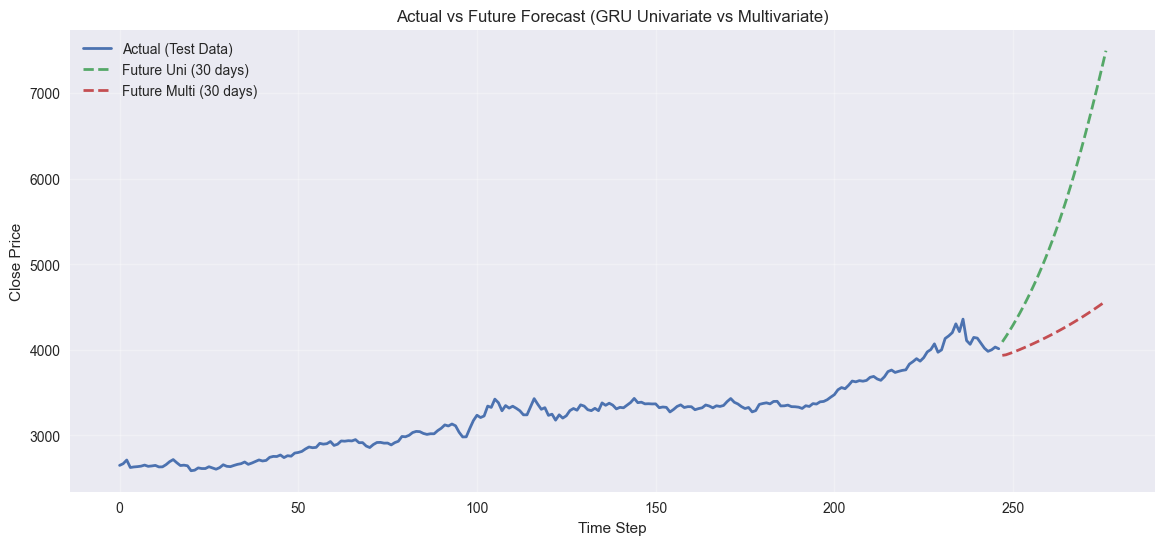

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# ==== Actual (dari testing set yang sudah denormalisasi) ====
actual = y_test_uni_denorm.flatten()
len_actual = len(actual)

# ==== Future Forecast (uni & multi) ====
future_steps = 30  # banyak hari prediksi
future_uni_30 = future_uni[:future_steps]
future_multi_30 = future_multi[:future_steps]

# index masa depan mulai setelah actual
future_index = np.arange(len_actual, len_actual + future_steps)

# ==== Plot ====
plt.figure(figsize=(14,6))

plt.plot(actual, label="Actual (Test Data)", linewidth=2)
plt.plot(future_index, future_uni_30, '--', label="Future Uni (30 days)", linewidth=2)
plt.plot(future_index, future_multi_30, '--', label="Future Multi (30 days)", linewidth=2)

plt.title("Actual vs Future Forecast (GRU Univariate vs Multivariate)")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [94]:
# Simpan model univariate
model_uni.save('gru_univariate.h5')

# Simpan model multivariate
model_multi.save('gru_multivariate.h5')


C:\Users\surhe\anaconda3\envs\skripsirekha\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
